# Multiple Linear Regression
##### We aim to predict students’ final scores using their class attendance, hours studied per week and sleep hours.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import kagglehub

### define dataset

In [13]:
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

df = pd.read_csv(path + r"/StudentPerformanceFactors.csv")
df.head()

100%|██████████| 93.9k/93.9k [00:00<00:00, 416kB/s]

Extracting files...


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### preprocessing

In [16]:
df.dropna()
df.shape

(6607, 20)

In [17]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [26]:
cdf = df[["Hours_Studied", "Attendance", "Sleep_Hours", "Exam_Score"]]

cdf.shape

(6607, 4)

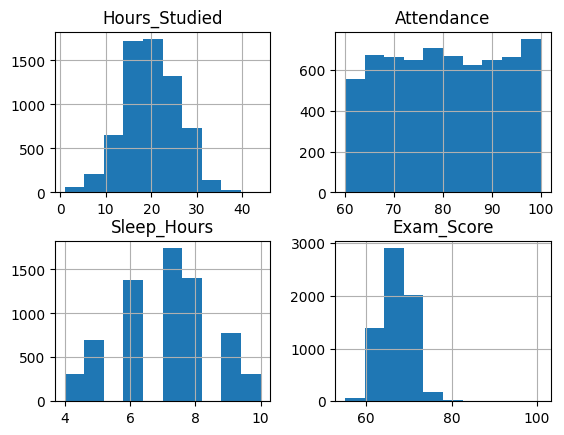

In [27]:
vis = cdf[["Hours_Studied", "Attendance", "Sleep_Hours", "Exam_Score"]]
vis.hist()
plt.show()

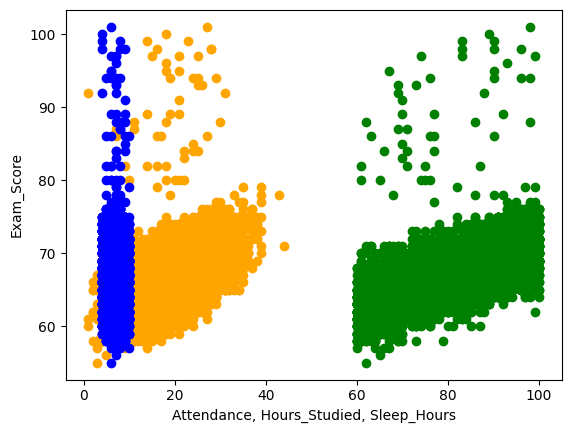

In [28]:
plt.scatter(cdf["Attendance"], cdf["Exam_Score"], color="green")
plt.scatter(cdf["Hours_Studied"], cdf["Exam_Score"], color="orange")
plt.scatter(cdf["Sleep_Hours"], cdf["Exam_Score"], color="blue")
plt.ylabel("Exam_Score")
plt.xlabel("Attendance, Hours_Studied, Sleep_Hours")
plt.show()

In [29]:
cdf.drop("Sleep_Hours", axis=1, inplace=True)

cdf.shape

C:\Users\User\AppData\Local\Temp\ipykernel_3384\607434090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.drop("Sleep_Hours", axis=1, inplace=True)


(6607, 3)

In [30]:
msk = np.random.rand(len(df)) < 0.8

train, test = cdf[msk], cdf[~msk]
train.shape, test.shape

((5328, 3), (1279, 3))

### model definition

In [33]:
mymodel = LinearRegression()

x_train = np.asanyarray(train[["Hours_Studied", "Attendance"]])
y_train = np.asanyarray(train[["Exam_Score"]])

mymodel.fit(x_train, y_train)

print(f"coefficient : {mymodel.coef_[0][0]} and {mymodel.coef_[0][1]} | intercept : {mymodel.intercept_[0]}")

coefficient : 0.29330488571395147 and 0.20047094861164216 | intercept : 45.32289947905447


### model evaluation

In [34]:
x_test = np.asanyarray(test[["Hours_Studied", "Attendance"]])
y_test = np.asanyarray(test[["Exam_Score"]])

y_pred_test = mymodel.predict(x_test)

In [35]:
mse = np.mean((y_test - y_pred_test) ** 2)
mae = np.mean(np.absolute(y_test - y_pred_test))
rmse = np.mean((y_test - y_pred_test) ** 2) ** 0.5
rmae = np.mean(np.absolute(y_test - y_pred_test)) ** 0.5
r2 = r2_score(y_test, y_pred_test)

print(f"mean squared error : {mse}|mean absolute error : {mae}|root mean squared error : {rmse}|root mean absolute error : {rmae}|r2 score : {r2}".title())

Mean Squared Error : 6.376287718592697|Mean Absolute Error : 1.5249020945044387|Root Mean Squared Error : 2.5251312279944376|Root Mean Absolute Error : 1.2348692621101387|R2 Score : 0.536976356778796
